# plot rl

In [1]:
from matplotlib import pyplot as plt
def process_data(file):
    fp =open(f"/home/ctj/jingyunliu/manhattan-mcts-rl/simulator_mhd_rl/log/20240508104433_grids35_drivers100_repo2any=False.log")
    # fp =open(f"/home/ctj/jingyunliu/manhattan-mcts-rl/simulator_mhd_rl/log/20240320162019_epoch4000_grid35.log")
    data = []
    n_line = 1
    for line in fp.readlines(): # 遍历每一行
        value = float(line.split("total_reward")[1].split(",")[0][1:])   # 每行取前14个字母，作为下面新建文件的名称
        data.append(value)
        n_line += 1
        if n_line == 474: 
            print(value)
            break
    return data

15025.93027383437


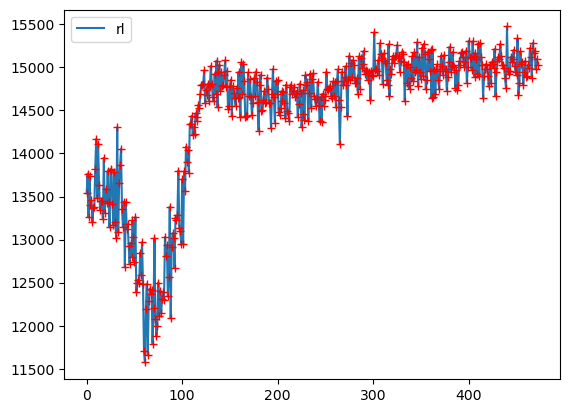

In [2]:
data = process_data(5)
x = range(len(data))
plt.plot(x,data,label="rl")
plt.plot(x,data,'r+')
plt.legend()
plt.show()

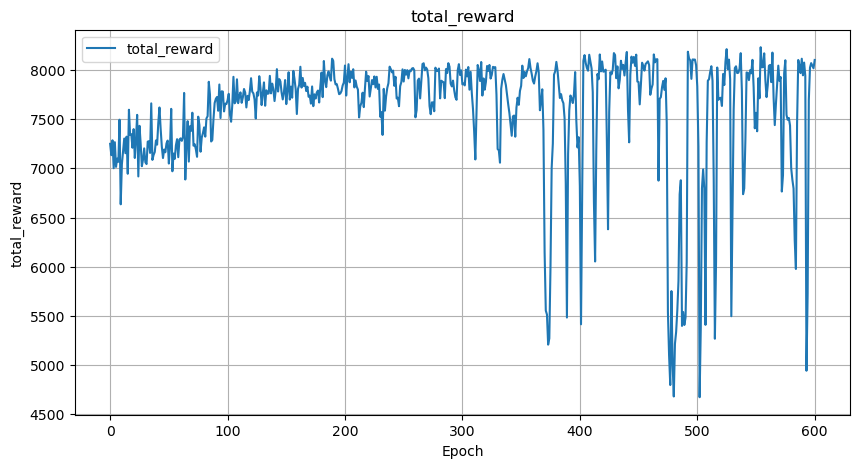

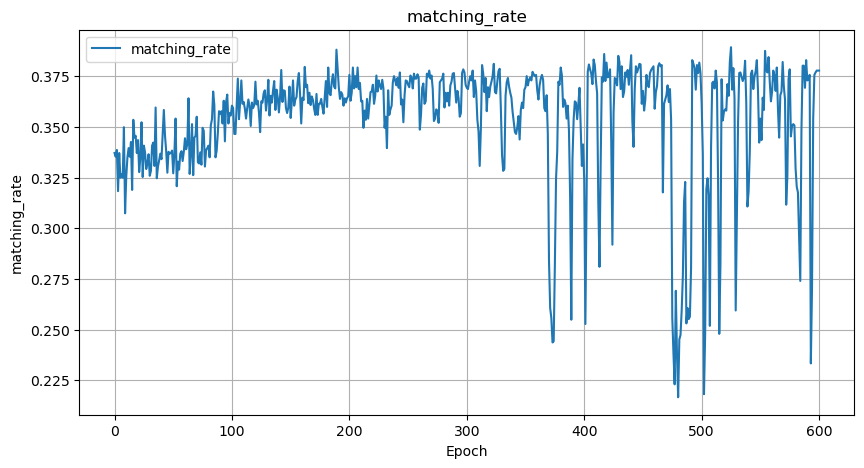

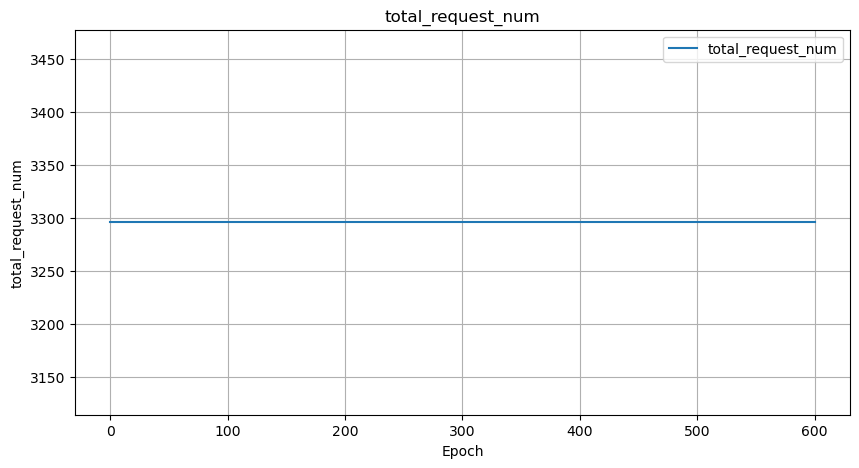

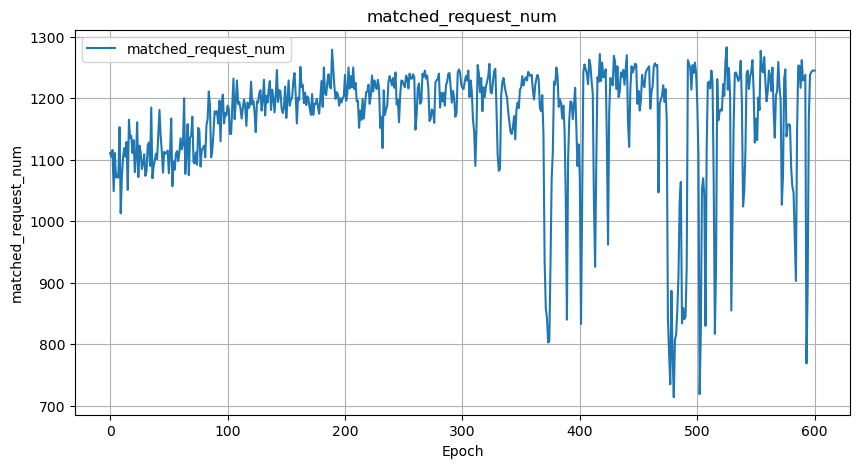

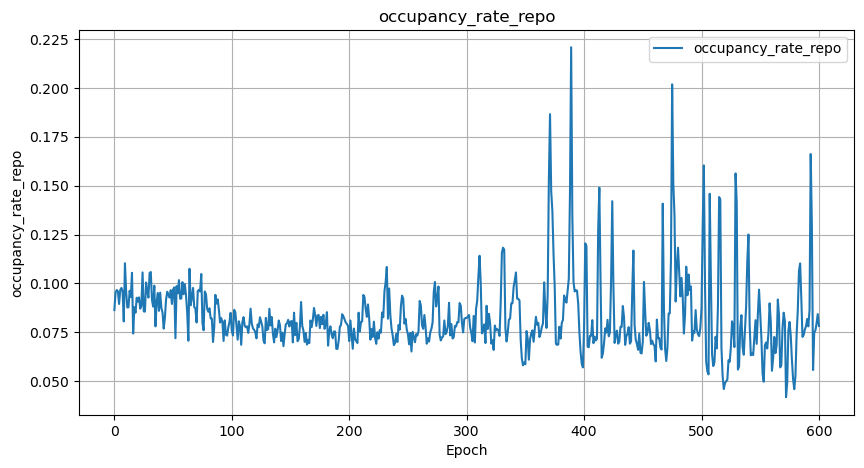

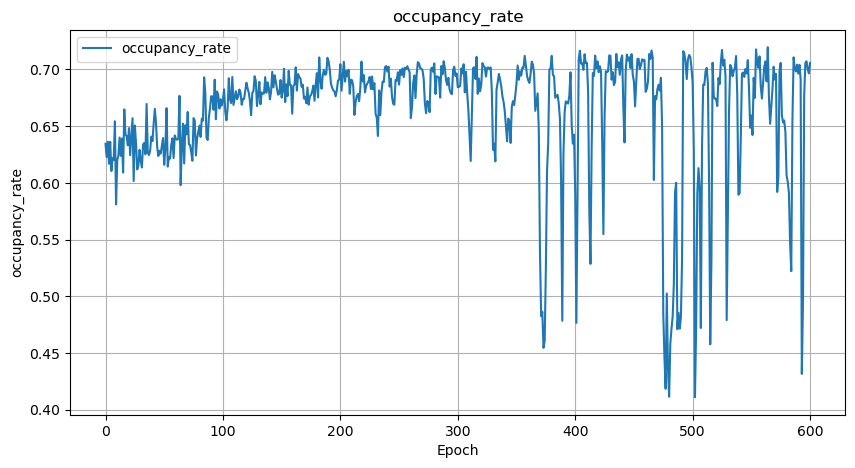

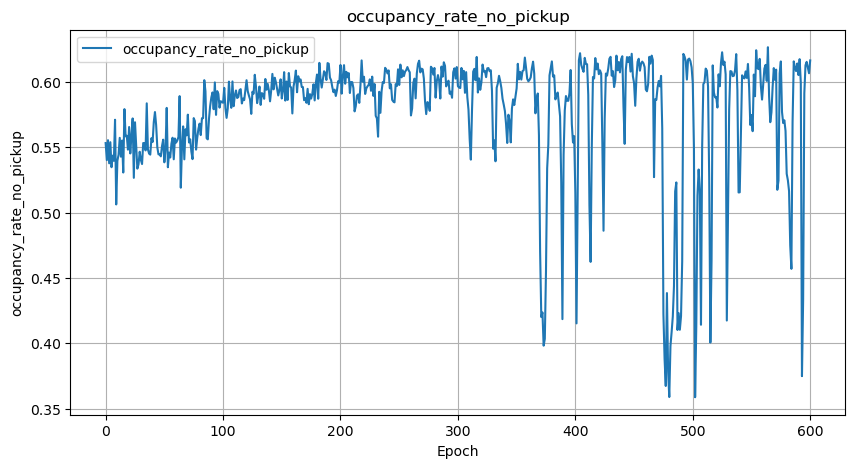

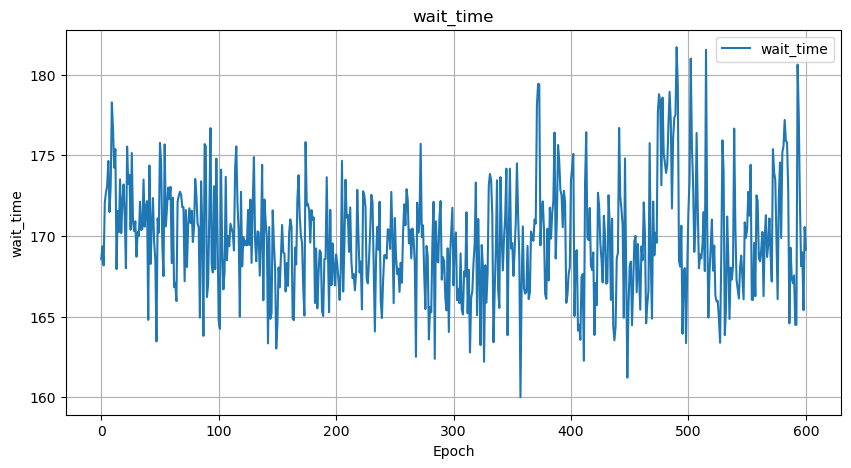

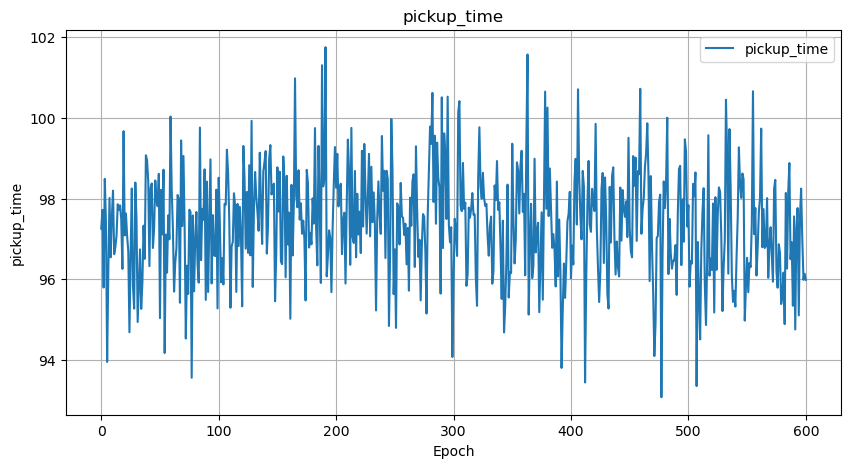

In [14]:
import matplotlib.pyplot as plt
import re

# Define the path to your log file
log_file_path = 'log/20240508224829_grids35_drivers50_repo2any=False.log'
# Define the pattern to extract the metrics from each line in the log file
metric_pattern = re.compile(
    r'epoch:\s*(\d+).*?total_reward:(.*?),'
    r'matching_rate:(.*?),'
    r'total_request_num:(.*?),'
    r'matched_request_num:(.*?),'
    r'occupancy_rate_repo:(.*?),'
    r'occupancy_rate:(.*?),'
    r'occupancy_rate_no_pickup:(.*?),'
    r'wait_time:(.*?),'
    r'pickup_time:(.*?)$'
)

# Initialize dictionary to store the metrics
metrics = {
    'total_reward': [],
    'matching_rate': [],
    'total_request_num': [],
    'matched_request_num': [],
    'occupancy_rate_repo': [],
    'occupancy_rate': [],
    'occupancy_rate_no_pickup': [],
    'wait_time': [],
    'pickup_time': []
}

# Read the log file and extract the metrics
with open(log_file_path, 'r') as file:
    for line in file:
        metric_match = metric_pattern.search(line)
        if metric_match:
            epoch = int(metric_match.group(1))
            # Break the loop if we have processed 5 epochs (0 to 4)
            # if epoch >= 300:
            #     break
            for i, key in enumerate(metrics.keys()):
                metrics[key].append(float(metric_match.group(i + 2)))

# Plotting each metric
for key, values in metrics.items():
    plt.figure(figsize=(10, 5))
    plt.plot(values, label=key)
    plt.title(key)
    plt.xlabel('Epoch')
    plt.ylabel(key)
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{key}.png")  # Save the figure
    plt.show()

### comparison grid 8 and grid 35

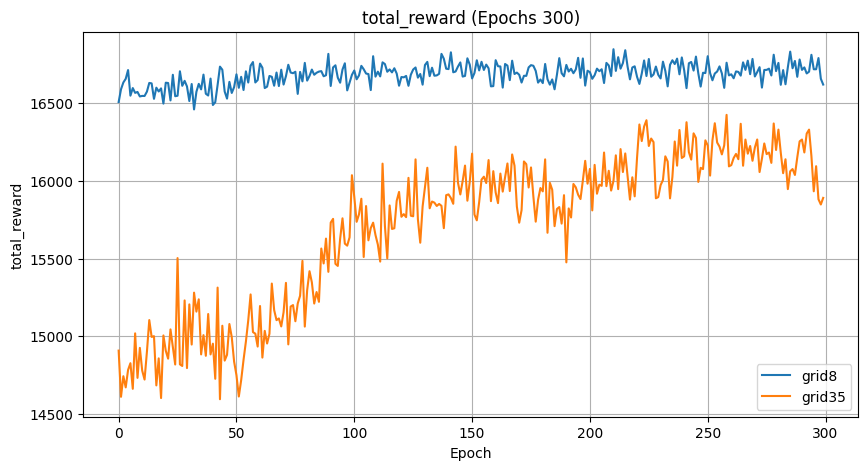

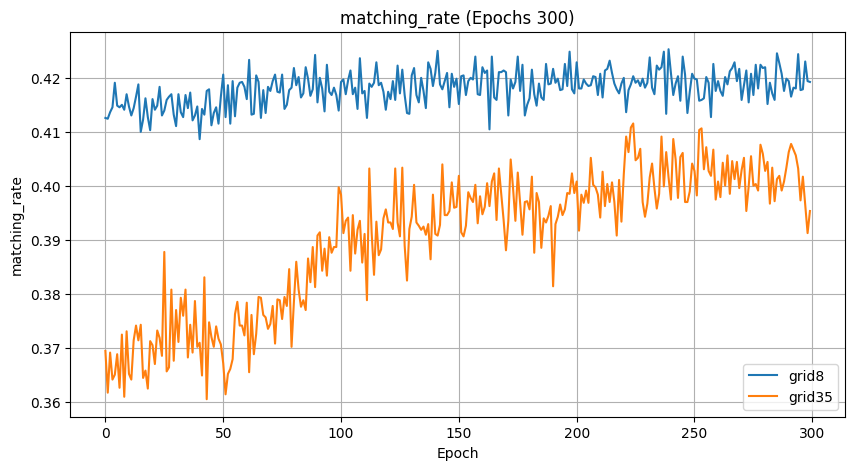

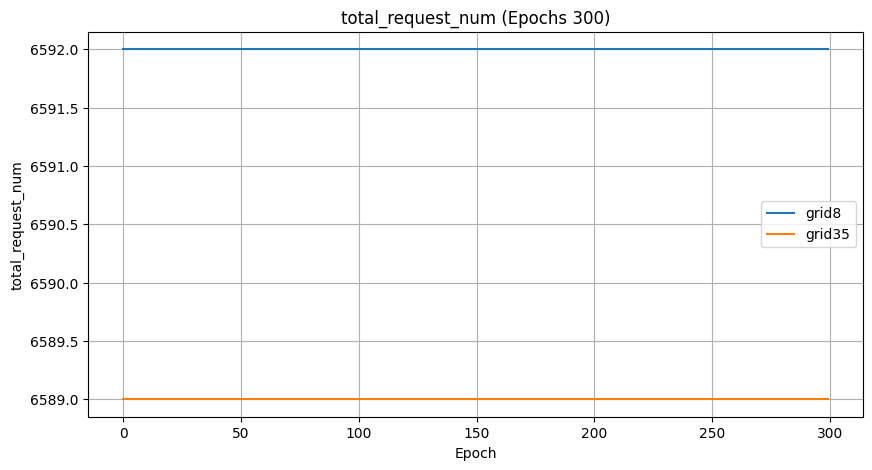

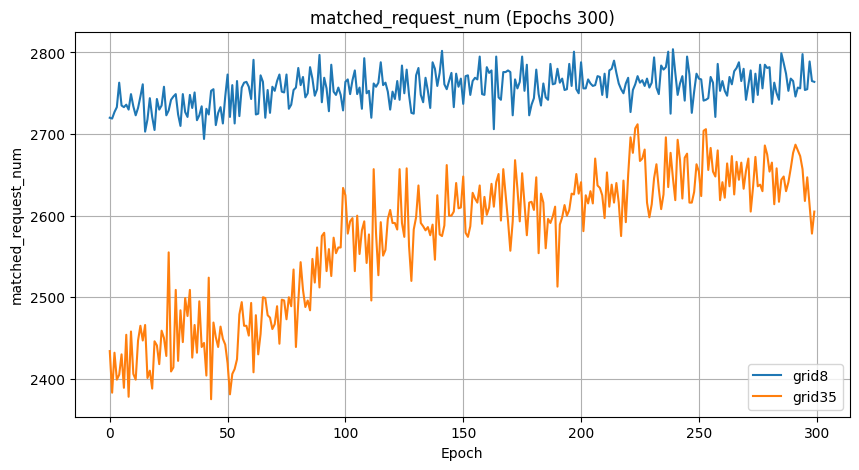

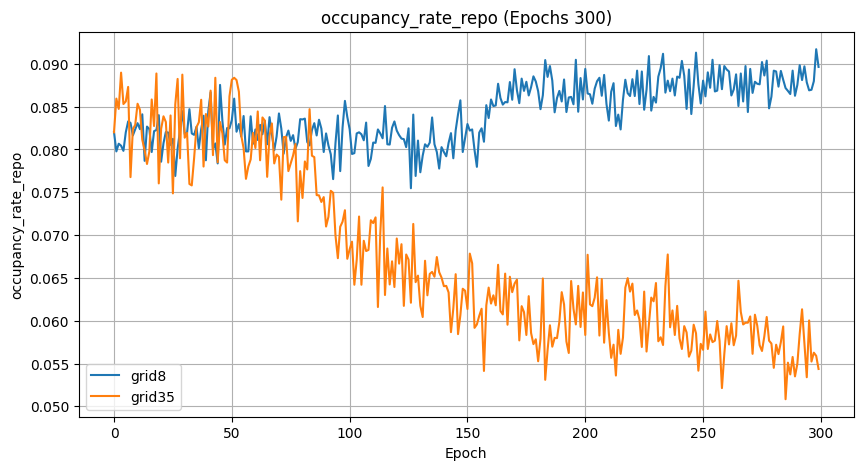

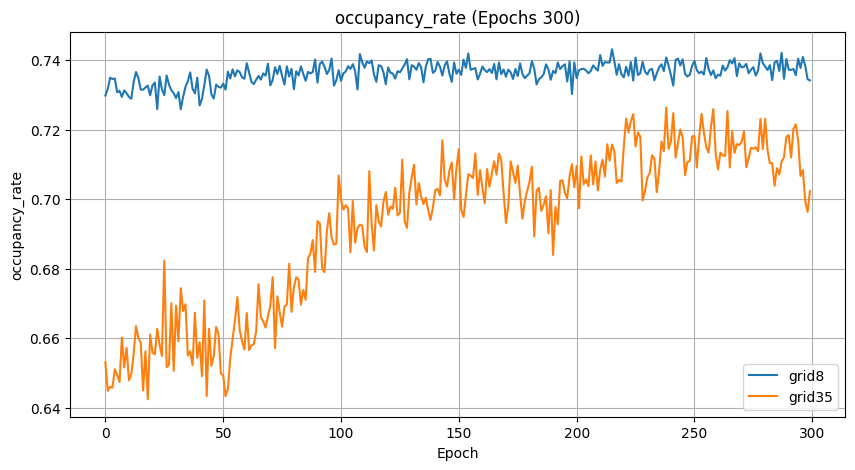

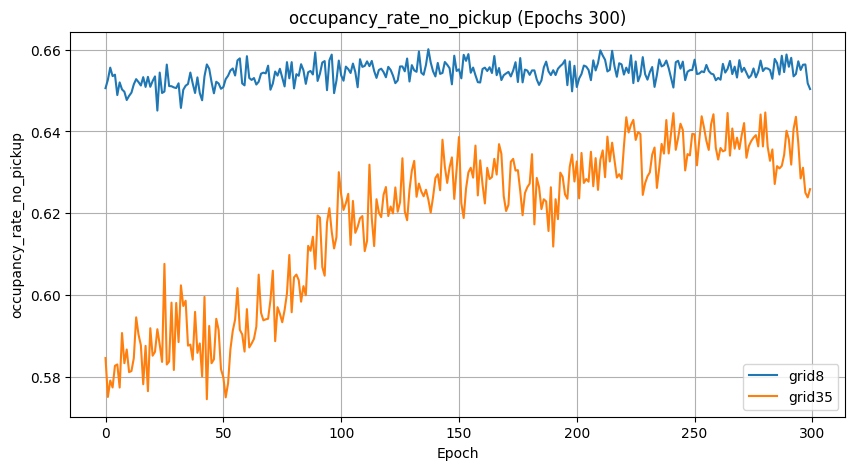

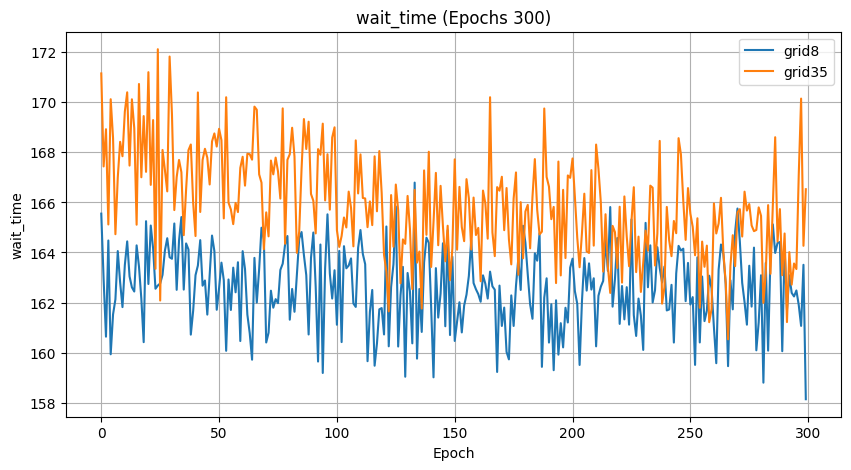

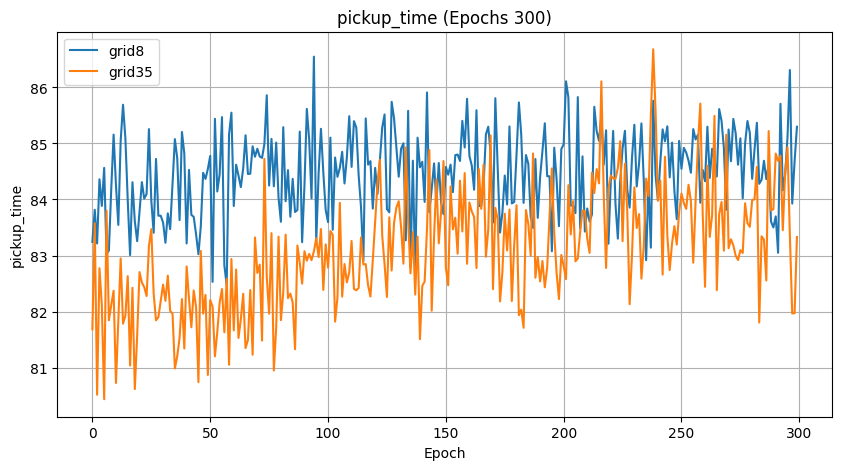

In [20]:
import matplotlib.pyplot as plt
import re

# Define the paths to your log files
log_file_paths = {
    'grid8': 'log/20240321100218_grids8_drivers100.log',
    'grid35': 'log/20240321095701_grids35_drivers100.log'
}

# Define the pattern to extract the metrics from each line in the log file
metric_pattern = re.compile(
    r'epoch:\s*(\d+).*?total_reward:(.*?),'
    r'matching_rate:(.*?),'
    r'total_request_num:(.*?),'
    r'matched_request_num:(.*?),'
    r'occupancy_rate_repo:(.*?),'
    r'occupancy_rate:(.*?),'
    r'occupancy_rate_no_pickup:(.*?),'
    r'wait_time:(.*?),'
    r'pickup_time:(.*?)$'
)

# Function to extract metrics from a log file
def extract_metrics(log_file_path):
    metrics = {
        'total_reward': [],
        'matching_rate': [],
        'total_request_num': [],
        'matched_request_num': [],
        'occupancy_rate_repo': [],
        'occupancy_rate': [],
        'occupancy_rate_no_pickup': [],
        'wait_time': [],
        'pickup_time': []
    }

    with open(log_file_path, 'r') as file:
        for line in file:
            metric_match = metric_pattern.search(line)
            if metric_match:
                epoch = int(metric_match.group(1))
                if epoch >= 300:
                    break
                for i, key in enumerate(metrics.keys()):
                    metrics[key].append(float(metric_match.group(i + 2)))
    
    return metrics

# Extract metrics for both files
metrics_data = {label: extract_metrics(path) for label, path in log_file_paths.items()}

# Plotting each metric for the first 300 epochs of both files
for key in metrics_data['grid8'].keys():
    plt.figure(figsize=(10, 5))
    
    for label, metrics in metrics_data.items():
        plt.plot(metrics[key], label=label)
    
    plt.title(f"{key} (Epochs 300)")
    plt.xlabel('Epoch')
    plt.ylabel(key)
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{key}_epochs_300.png")  # Save the figure
    plt.show()

## density

In [ ]:
import matplotlib.pyplot as plt
import re

# Define the paths to your log files
log_file_paths = {
    'drivers100': 'log/20240321100218_grids8_drivers100.log',
    'drivers500': 'log/20240321095701_grids35_drivers100.log'
}

# Define the pattern to extract the metrics from each line in the log file
metric_pattern = re.compile(
    r'epoch:\s*(\d+).*?total_reward:(.*?),'
    r'matching_rate:(.*?),'
    r'total_request_num:(.*?),'
    r'matched_request_num:(.*?),'
    r'occupancy_rate_repo:(.*?),'
    r'occupancy_rate:(.*?),'
    r'occupancy_rate_no_pickup:(.*?),'
    r'wait_time:(.*?),'
    r'pickup_time:(.*?)$'
)

# Function to extract metrics from a log file
def extract_metrics(log_file_path):
    metrics = {
        'total_reward': [],
        'matching_rate': [],
        'total_request_num': [],
        'matched_request_num': [],
        'occupancy_rate_repo': [],
        'occupancy_rate': [],
        'occupancy_rate_no_pickup': [],
        'wait_time': [],
        'pickup_time': []
    }

    with open(log_file_path, 'r') as file:
        for line in file:
            metric_match = metric_pattern.search(line)
            if metric_match:
                epoch = int(metric_match.group(1))
                if epoch >= 300:
                    break
                for i, key in enumerate(metrics.keys()):
                    metrics[key].append(float(metric_match.group(i + 2)))
    
    return metrics

# Extract metrics for both files
metrics_data = {label: extract_metrics(path) for label, path in log_file_paths.items()}

# Plotting each metric for the first 300 epochs of both files
for key in metrics_data['grid8'].keys():
    plt.figure(figsize=(10, 5))
    
    for label, metrics in metrics_data.items():
        plt.plot(metrics[key], label=label)
    
    plt.title(f"{key} (Epochs 300)")
    plt.xlabel('Epoch')
    plt.ylabel(key)
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{key}_epochs_300.png")  # Save the figure
    plt.show()